In [2]:
csvfname = 'transpose/628.csv' # Filename of CSV file containing contaminated data
channel = 1 # Second electrode out of 64 EEG electrodes, use values 0 to 63

In [3]:
import adaptfilt as adf
import scipy as sp
from scipy import fftpack, signal
from scipy.signal import butter, lfilter, freqz
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Reading the aforementioned column along with
# HEOG (column 65), VEOG (column 66) and ECG signals (column 67)
x = np.genfromtxt(csvfname, delimiter = ',', usecols = (channel, 64, 65, 66))
x_s = 500 # Sampling rate in Hz (given along with dataset)
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * x_s

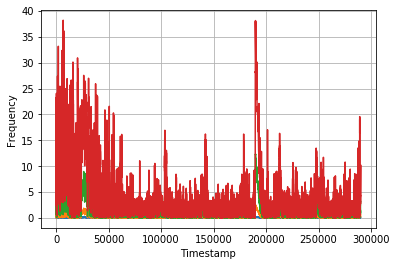

In [5]:
# Running a bandpass filter in our frequency domain 
# to remove all frequencies other than between 1-40 Hz
# with a Butterworth filter of order 6

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

out = butter_bandpass_filter(X, 1, 40, 500, 6)

plt.figure()
plt.plot(np.abs(out))
plt.grid()
plt.ylabel('Frequency')
plt.xlabel('Timestamp')
plt.show()

In [5]:
# Generate d(n) using randomly chosen coefficients
coeffs = np.concatenate(([0.8], np.zeros(8), [-0.7], np.zeros(9), [0.5], np.zeros(11), [-0.3], np.zeros(3), [0.1], np.zeros(20), [-0.05]))
d1 = np.convolve(np.abs(out[0:100000, 0]), coeffs)
u1 = np.sin(2*np.pi*np.arange(100056)*50/100056) * d1

# Apply adaptive filtering
M = 100 # Desired number of filter taps
step = 0.0040 # Step size of the algorithm
# Perform normalized least-mean-squares (NLMS) adaptive filtering on u to minimize error given by e=d-y, where y is the output of the adaptive filter.
y1, e1, w1 = adf.nlms(u1, d1, M, step, leak=1, returnCoeffs=True)

# Calculate mean square weight error
mswe1 = adf.mswe(w1, coeffs)

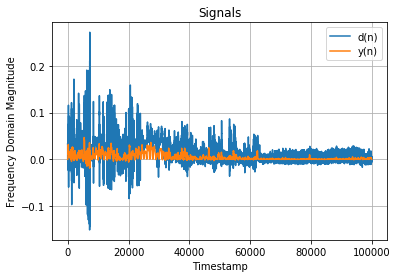

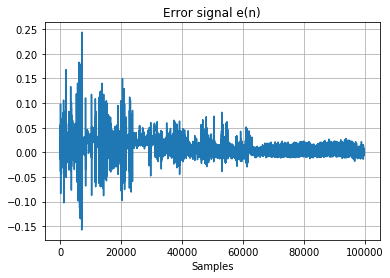

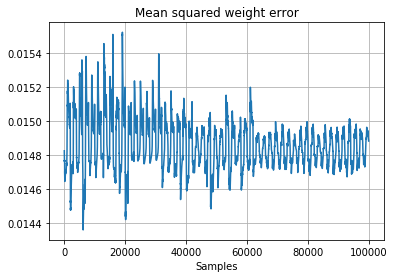

In [6]:
# Plot the signals
plt.figure()
plt.title("Signals")
plt.plot(d1, label="d(n)")
plt.plot(y1, label="y(n)")
plt.grid()
plt.legend()
plt.ylabel('Frequency Domain Magnitude')
plt.xlabel('Timestamp')

plt.figure()
plt.title('Error signal e(n)')
plt.plot(e1)
plt.grid()
plt.xlabel('Samples')

# Plot mean squared weight error
plt.figure()
plt.title('Mean squared weight error')
plt.plot(mswe1)
plt.grid()
plt.xlabel('Samples')

plt.show()

In [7]:
d2 = np.convolve(np.abs(out[0:100000, 1]), coeffs)
y2, e2, w2 = adf.nlms(y1, d2, M, step, leak=1, returnCoeffs=True)

# Calculate mean square weight error
mswe2 = adf.mswe(w2, coeffs)

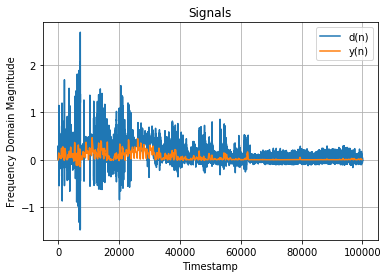

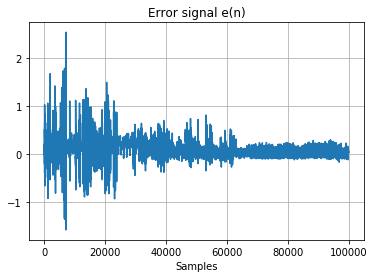

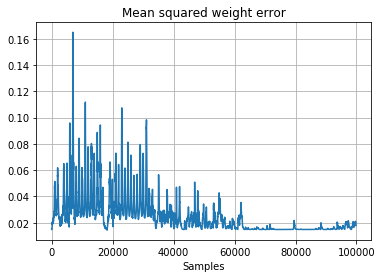

In [8]:
# Plot the signals
plt.figure()
plt.title("Signals")
plt.plot(d2, label="d(n)")
plt.plot(y2, label="y(n)")
plt.grid()
plt.legend()
plt.ylabel('Frequency Domain Magnitude')
plt.xlabel('Timestamp')

plt.figure()
plt.title('Error signal e(n)')
plt.plot(e2)
plt.grid()
plt.xlabel('Samples')

plt.figure()
plt.title('Mean squared weight error')
plt.plot(mswe2)
plt.grid()
plt.xlabel('Samples')

plt.show()

In [9]:
d3 = np.convolve(np.abs(out[0:100000, 2]), coeffs)
y3, e3, w3 = adf.nlms(y2, d3, M, step, leak=1, returnCoeffs=True)

# Calculate mean square weight error
mswe3 = adf.mswe(w3, coeffs)

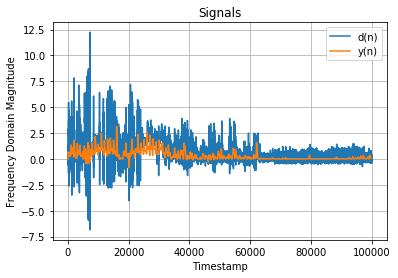

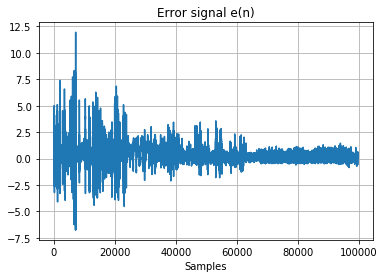

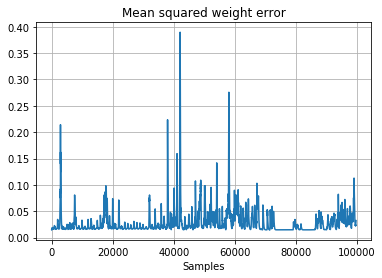

In [10]:
# Plot the signals
plt.figure()
plt.title("Signals")
plt.plot(d3, label="d(n)")
plt.plot(y3, label="y(n)")
plt.grid()
plt.legend()
plt.ylabel('Frequency Domain Magnitude')
plt.xlabel('Timestamp')

plt.figure()
plt.title('Error signal e(n)')
plt.plot(e3)
plt.grid()
plt.xlabel('Samples')

plt.figure()
plt.title('Mean squared weight error')
plt.plot(mswe3)
plt.grid()
plt.xlabel('Samples')

plt.show()

In [11]:
d4 = np.convolve(np.abs(out[0:100000, 3]), coeffs)
y4, e4, w4 = adf.nlms(y3, d4, M, step, leak=1, returnCoeffs=True)

# Calculate mean square weight error
mswe4 = adf.mswe(w4, coeffs)

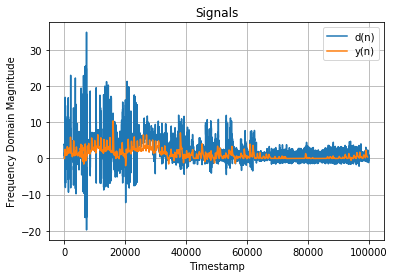

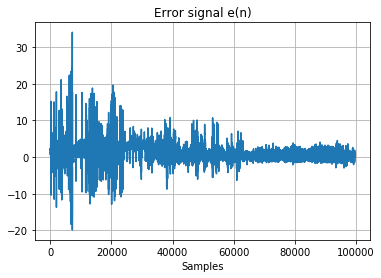

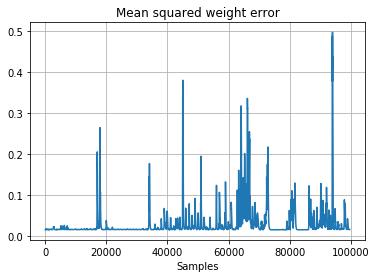

In [12]:
# Plot the signals
plt.figure()
plt.title("Signals")
plt.plot(d4, label="d(n)")
plt.plot(y4, label="y(n)")
plt.grid()
plt.legend()
plt.ylabel('Frequency Domain Magnitude')
plt.xlabel('Timestamp')

plt.figure()
plt.title('Error signal e(n)')
plt.plot(e4)
plt.grid()
plt.xlabel('Samples')

plt.figure()
plt.title('Mean squared weight error')
plt.plot(mswe4)
plt.grid()
plt.xlabel('Samples')

plt.show()

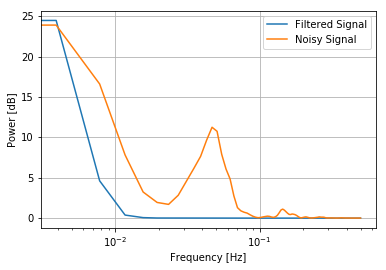

In [28]:
freqs1, psd1 = signal.welch(y4)
freqs2, psd2 = signal.welch(d1*60) # 60 is the scaling factor - may need alterations depending on input data
plt.figure()
plt.semilogx(freqs1, psd1, label="Filtered Signal")
plt.semilogx(freqs2, psd2, label="Noisy Signal")
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [dB]')
plt.grid()
plt.show()